<a href="https://colab.research.google.com/github/newfrogg/Automatic-Differentiation/blob/main/autodiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Mục lớn                             | Mục nhỏ                                                         |           |
|-------------------------------------|-----------------------------------------------------------------|-----------|
| Introduction                        |                                                                 |  1 người  |
|                                     | Differential Calculus                                           |  Tử Quân  |
|                                     | Rules of Calculus                                               |  Tử Quân  |
|                                     | Multivariate Chain Rule                                         |  Tử Quân  |
|                                     | Geometry of Gradients and Gradient Descent                      |  Tử Quân  |
| What Autodiff Isn’t                 |                                                                 |  3 người  |
|                                     | Autodiff is not finite differences (numerical differentiation)  |  An Đông  |
|                                     | Autodiff is not symbolic differentiation                        |  An Đông  |
|                                     | What autodiff is ?                                              |  An Đông  |
|                                     | Types of Autodiff (explain forward, backward)                   |  An Đông  |
|                                     | Backpropagation Algorithm                                       |  Gia Hinh |
|                                     | Gradient-Based Optimization                                     |  Gia Hinh |
|                                     | give an example and describe the autodiff step-by-step workflow |  Gia Hinh |
|                                     | Summary. Compare betwwen each type advancement of each types    |  Gia Hinh |
| Visualization. Code, Implementation |                                                                 |  1 người  |
|                                     | Code                                                            | Bảo Lương |
| Exercise                            |                                                                 |  2 người  |
|                                     | Q1-4                                                            |   Triết   |
|                                     | Q5-8                                                            | Minh Quân |

# Introduction

## Differential Calculus
## Rules of Calculus
## Geometry of Gradients and Gradient Descent

## Multivariate Chain Rule
## The Backpropagation Algorithm

https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/single-variable-calculus.html
https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/multivariable-calculus.html

# What Autodiff Isn’t

## Autodiff is not finite differences (numerical differentiation)

## Autodiff is not symbolic differentiation

## What autodiff is ? Types of Autodiff (explain forward, backward)
f(x1,x2) = [sin(x1/x2) + x1/x2 - e^x2] * [x1/x2 + e^x2]

## Types of Autodiff (explain forward, backward)







## Backpropagation Algorithm
## Gradient-Based Optimization
## give an example and describe the autodiff step-by-step workflow
## Summary. Compare betwwen each type advancement of each types

# Visualization

Code, implement AutoDiff, explain with an example. show backward and forward
Ex: f(x1, x2) = ln(x1) + x1x2 - sin(x2)

https://d2l.ai/chapter_preliminaries/autograd.html

https://homepages.inf.ed.ac.uk/htang2/mlg2022/tutorial-3.pdf


# Exercises (1-4)

1. Why is the second derivative much more expensive to compute than the first derivative?
1. After running the function for backpropagation, immediately run it again and see what happens. Investigate.
1. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?
1. Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.



# Exercises (5-8)
1. Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.
1. Use the chain rule to compute the derivative $\frac{df}{dx}$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.
1. Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as *forward differentiation*, whereas the path from $f$ to $x$ is known as backward differentiation.
1. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.

#### **5. Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.**

The function is given by:

<p align="center">$ f(x) = ((\log x^2) \cdot \sin x) + x^{-1} $</p>

Since $\log x^2 = 2 \log |x|$, we rewrite it as:

$ f(x) = (2 \log |x| \cdot \sin x) + \frac{1}{x} $

We construct a dependency graph to trace the computation from the input $x$ to the output $f(x)$. Each node represents a variable or operation, and edges represent dependencies.

#### *Dependency Graph*

The computational steps are:
1. Input: $x$.
2. Compute $|x|$.
3. Compute $\log |x|$.
4. Compute $2 \log |x|$.
5. Compute $\sin x$.
6. Compute the product $2 \log |x| \cdot \sin x$.
7. Compute $x^{-1} = \frac{1}{x}$.
8. Compute $f(x) = (2 \log |x| \cdot \sin x) + x^{-1}$.

#### *Graph Structure*
- **Nodes**:
  - $x$: Input.
  - $|x|$: Absolute value of $x$.
  - $\log |x|$: Logarithm of $|x|$.
  - $2 \log |x|$: Scaled logarithm.
  - $\sin x$: Sine of $x$.
  - $\text{product}$: $2 \log |x| \cdot \sin x$.
  - $x^{-1}$: Inverse of $x$.
  - $f(x)$: Final output.
- **Edges**:
  - $x \to |x|$
  - $|x| \to \log |x|$
  - $\log |x| \to 2 \log |x|$
  - $x \to \sin x$
  - $2 \log |x|, \sin x \to \text{product}$
  - $x \to x^{-1}$
  - $\text{product}, x^{-1} \to f(x)$

In [4]:
!pip install networkx matplotlib

zsh:1: command not found: pip


Matplotlib is building the font cache; this may take a moment.


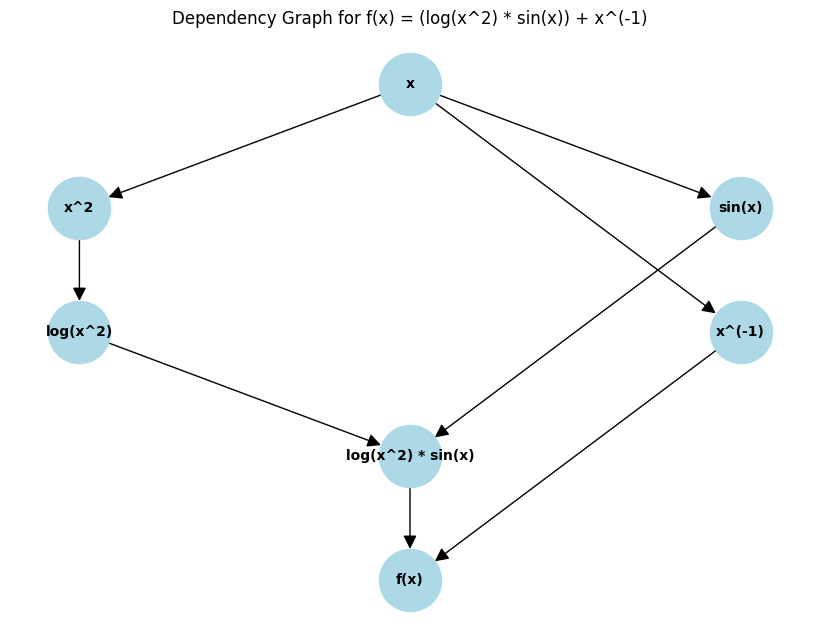

In [6]:
# Install required libraries (run in terminal or notebook if not installed)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (representing variables or operations)
nodes = [
    "x", 
    "x^2", 
    "log(x^2)", 
    "sin(x)", 
    "log(x^2) * sin(x)", 
    "x^(-1)", 
    "f(x)"
]
G.add_nodes_from(nodes)

# Add edges (representing dependencies)
edges = [
    ("x", "x^2"),
    ("x^2", "log(x^2)"),
    ("x", "sin(x)"),
    ("log(x^2)", "log(x^2) * sin(x)"),
    ("sin(x)", "log(x^2) * sin(x)"),
    ("x", "x^(-1)"),
    ("log(x^2) * sin(x)", "f(x)"),
    ("x^(-1)", "f(x)")
]
G.add_edges_from(edges)

# Define node positions using a hierarchical layout
pos = {
    "x": (0, 4),
    "x^2": (-1, 3),
    "sin(x)": (1, 3),
    "log(x^2)": (-1, 2),
    "x^(-1)": (1, 2),
    "log(x^2) * sin(x)": (0, 1),
    "f(x)": (0, 0)
}

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_color="lightblue", 
    node_size=2000, 
    font_size=10, 
    font_weight="bold", 
    arrowsize=20
)
plt.title("Dependency Graph for f(x) = (log(x^2) * sin(x)) + x^(-1)", fontsize=12)
plt.show()

#### **6. Use the chain rule to compute the derivative $\frac{df}{dx}$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.**

#### Derivative of $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$

Using the rewritten form: $f(x) = (2 \log |x| \cdot \sin x) + \frac{1}{x}$

#### *Step 1: Apply the product rule to the first term*
$\frac{d}{dx}(2 \log |x| \cdot \sin x) = 2 \log |x| \cdot \frac{d}{dx}(\sin x) + \sin x \cdot \frac{d}{dx}(2 \log |x|)$

#### *Step 2: Calculate individual derivatives*
- $\frac{d}{dx}(\sin x) = \cos x$
- $\frac{d}{dx}(2 \log |x|) = 2 \cdot \frac{d}{dx}(\log |x|) = 2 \cdot \frac{1}{|x|} \cdot \frac{d}{dx}(|x|) = 2 \cdot \frac{1}{|x|} \cdot \frac{x}{|x|} = \frac{2}{x}$
- $\frac{d}{dx}(x^{-1}) = \frac{d}{dx}(\frac{1}{x}) = -\frac{1}{x^2}$

#### *Step 3: Substitute back into the product rule*
$\frac{d}{dx}(2 \log |x| \cdot \sin x) = 2 \log |x| \cdot \cos x + \sin x \cdot \frac{2}{x}$

#### *Step 4: Add the derivative of the second term*
$\frac{df}{dx} = 2 \log |x| \cdot \cos x + \frac{2\sin x}{x} - \frac{1}{x^2}$

#### *Final result:*
$\frac{df}{dx} = 2 \log |x| \cdot \cos x + \frac{2\sin x}{x} - \frac{1}{x^2}$

#### Original Function Nodes:
- $x$: Input
- $|x|$: Absolute value of $x$
- $\log |x|$: Logarithm of $|x|$
- $2 \log |x|$: Scaled logarithm
- $\sin x$: Sine of $x$
- $\text{product}$: $2 \log |x| \cdot \sin x$
- $x^{-1}$: Inverse of $x$
- $f(x)$: Final output $(2 \log |x| \cdot \sin x) + x^{-1}$

#### Derivative Nodes:
- $\frac{x}{|x|}$: Derivative of $|x|$ with respect to $x$
- $\frac{1}{|x|}$: Derivative component for $\log |x|$
- $\frac{2}{x}$: Derivative of $2 \log |x|$
- $\cos x$: Derivative of $\sin x$
- $2 \log |x| \cdot \cos x$: First term of product rule
- $\frac{2\sin x}{x}$: Second term of product rule
- $-\frac{1}{x^2}$: Derivative of $x^{-1}$
- $\frac{df}{dx}$: Final derivative $2 \log |x| \cdot \cos x + \frac{2\sin x}{x} - \frac{1}{x^2}$

#### Additional Edges for Derivatives:
- $x \to \frac{x}{|x|}$
- $|x|, \frac{x}{|x|} \to \frac{1}{|x|}$
- $\frac{1}{|x|} \to \frac{2}{x}$
- $x \to \cos x$
- $2 \log |x|, \cos x \to 2 \log |x| \cdot \cos x$
- $\sin x, x \to \frac{2\sin x}{x}$
- $x \to -\frac{1}{x^2}$
- $2 \log |x| \cdot \cos x, \frac{2\sin x}{x}, -\frac{1}{x^2} \to \frac{df}{dx}$

In [7]:
import numpy as np

def compute_f(x):
    if x == 0:
        raise ValueError("Function undefined at x=0")
    # Step 1: Input x
    # Step 2: Compute |x|
    abs_x = np.abs(x)
    # Step 3: Compute log|x|
    log_abs_x = np.log(abs_x)
    # Step 4: Compute 2*log|x|
    scaled_log = 2 * log_abs_x
    # Step 5: Compute sin(x)
    sin_x = np.sin(x)
    # Step 6: Compute product
    product = scaled_log * sin_x
    # Step 7: Compute x^(-1)
    x_inv = 1 / x
    # Step 8: Compute f(x)
    result = product + x_inv
    return result

# Example computation
try:
    x = 1.0
    print(f"f({x}) = {compute_f(x)}")
except ValueError as e:
    print(e)

f(1.0) = 1.0


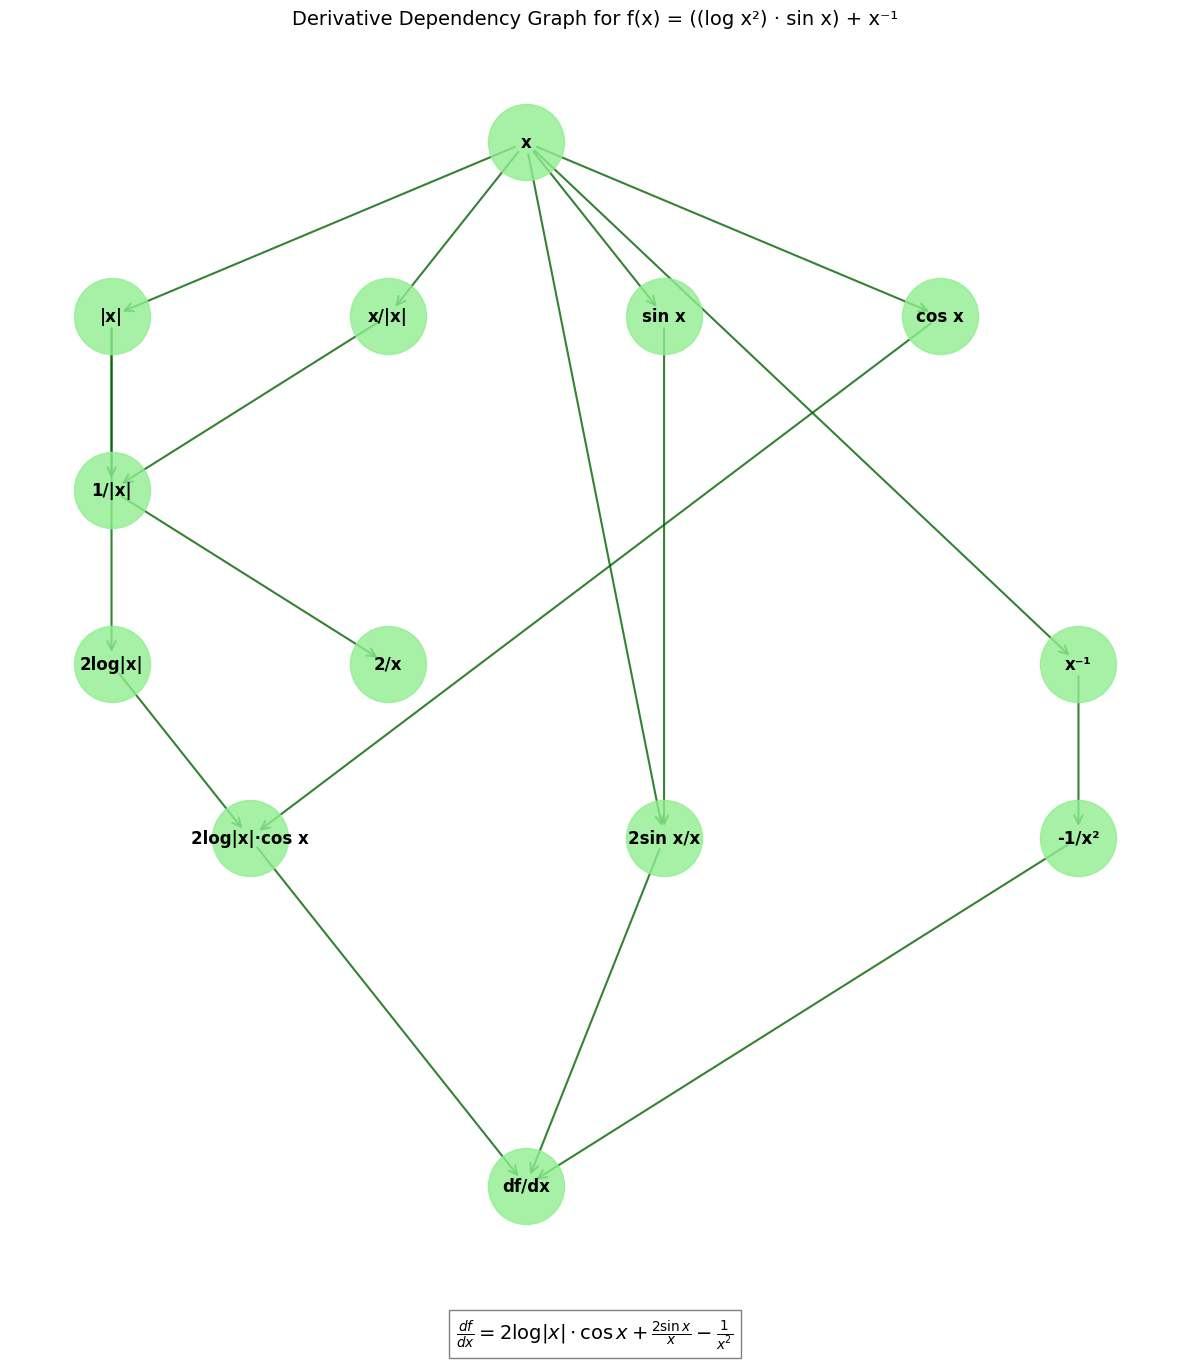

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Create directed graph for derivatives only
G = nx.DiGraph()

# Define derivative nodes only
derivative_nodes = [
    "x",
    "|x|",
    "x/|x|",
    "1/|x|",
    "2/x",
    "sin x",
    "cos x",
    "2log|x|",
    "2log|x|·cos x",
    "2sin x/x",
    "x⁻¹",
    "-1/x²",
    "df/dx"
]

# Add all nodes
G.add_nodes_from(derivative_nodes)

# Add edges for derivative calculation only
derivative_edges = [
    ("x", "|x|"),
    ("x", "x/|x|"),
    ("|x|", "1/|x|"),
    ("x/|x|", "1/|x|"),
    ("1/|x|", "2/x"),
    ("x", "sin x"),
    ("x", "cos x"),
    ("|x|", "2log|x|"),
    ("2log|x|", "2log|x|·cos x"),
    ("cos x", "2log|x|·cos x"),
    ("sin x", "2sin x/x"),
    ("x", "2sin x/x"),
    ("x", "x⁻¹"),
    ("x⁻¹", "-1/x²"),
    ("2log|x|·cos x", "df/dx"),
    ("2sin x/x", "df/dx"),
    ("-1/x²", "df/dx")
]

# Add all edges
G.add_edges_from(derivative_edges)

# Set up the plot
plt.figure(figsize=(12, 14))

# Create a hierarchical layout starting from the top
pos = {
    "x": (0, 0),
    "|x|": (-3, -1),
    "x/|x|": (-1, -1),
    "1/|x|": (-3, -2),
    "2log|x|": (-3, -3),
    "2/x": (-1, -3),
    "sin x": (1, -1),
    "cos x": (3, -1),
    "2log|x|·cos x": (-2, -4),
    "2sin x/x": (1, -4),
    "x⁻¹": (4, -3),
    "-1/x²": (4, -4),
    "df/dx": (0, -6)
}

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightgreen', alpha=0.8)

# Draw edges
nx.draw_networkx_edges(
    G, pos, width=1.5, alpha=0.8,
    edge_color="darkgreen", arrows=True, arrowstyle='->', arrowsize=15
)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

# Set title and remove axes
plt.title("Derivative Dependency Graph for f(x) = ((log x²) · sin x) + x⁻¹", fontsize=14)
plt.axis("off")

# Add mathematical equation at the bottom
plt.figtext(0.5, 0.01,
            r"$\frac{df}{dx} = 2 \log |x| \cdot \cos x + \frac{2\sin x}{x} - \frac{1}{x^2}$",
            ha="center", fontsize=14, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

# Adjust layout and show
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig("derivative_only_graph.png", dpi=300, bbox_inches="tight")
plt.show()

 #### **7. Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as *****forward differentiation*****, whereas the path from $f$ to $x$ is known as backward differentiation.**

The function is:
$f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$

Rewritten using $\log x^2 = 2 \log |x|$:
$f(x) = (2 \log |x| \cdot \sin x) + \frac{1}{x}$

We compute the derivative $f'(x)$ using:
1. **Forward Differentiation**: Propagating derivatives from $x$ to $f(x)$.
2. **Backward Differentiation**: Propagating sensitivities from $f(x)$ to $x$.

Both methods follow the dependency graph:
- Nodes: $x$, $|x|$, $\log |x|$, $2 \log |x|$, $\sin x$, $\text{product} = 2 \log |x| \cdot \sin x$, $x^{-1}$, $f(x)$.
- Edges define dependencies as shown in the previous section.

#### *Forward Differentiation*
In forward mode, we compute $\dot{v} = \frac{dv}{dx}$ for each node $v$, starting with $\dot{x} = 1$.

##### Steps
1. $x$: $\dot{x} = 1$.
2. $|x|$: $\dot{|x|} = \text{sgn}(x)$.
3. $\log |x|$: $\dot{\log |x|} = \frac{1}{x}$.
4. $2 \log |x|$: $\dot{2 \log |x|} = \frac{2}{x}$.
5. $\sin x$: $\dot{\sin x} = \cos x$.
6. $\text{product} = 2 \log |x| \cdot \sin x$: $\dot{\text{product}} = \frac{2}{x} \sin x + 2 \log |x| \cos x$.
7. $x^{-1}$: $\dot{x^{-1}} = -\frac{1}{x^2}$.
8. $f(x) = \text{product} + x^{-1}$: $\dot{f} = \frac{2 \sin x}{x} + 2 \log |x| \cos x - \frac{1}{x^2}$.

#### *Backward Differentiation*
In backward mode, we compute $\bar{v} = \frac{\partial f}{\partial v}$, starting with $\bar{f} = 1$, and propagate sensitivities backward.

##### Steps
1. $f(x)$: $\bar{f} = 1$. For $f = \text{product} + x^{-1}$, $\bar{\text{product}} = 1$, $\bar{x^{-1}} = 1$.
2. $\text{product} = 2 \log |x| \cdot \sin x$: $\bar{2 \log |x|} = \sin x$, $\bar{\sin x} = 2 \log |x|$.
3. $x^{-1}$: Contributes $\bar{x}_q = -\frac{1}{x^2}$.
4. $2 \log |x|$: $\bar{\log |x|} = 2 \sin x$.
5. $\sin x$: Contributes $\bar{x}_v = 2 \log |x| \cos x$.
6. $\log |x|$: $\bar{|x|} = \frac{2 \sin x}{|x|}$.
7. $|x|$: Contributes $\bar{x}_{|x|} = \frac{2 \sin x}{x}$.
8. $x$: Total $\bar{x} = \frac{2 \sin x}{x} + 2 \log |x| \cos x - \frac{1}{x^2}$.

##### Result
Both methods yield:
$f'(x) = \frac{2 \sin x}{x} + 2 \log |x| \cos x - \frac{1}{x^2}$

#### **8. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.**

#### *When to Use Forward vs. Backward Differentiation*

**Forward differentiation** (forward-mode automatic differentiation) and **backward differentiation** (reverse-mode automatic differentiation) are methods to compute gradients of a function. The choice between them depends on the computational context, including the amount of intermediate data, parallelization opportunities, and the dimensions of inputs and outputs (i.e., the size of matrices and vectors involved). Below, we analyze these factors to determine when each method is preferable.

#### *Overview of Forward and Backward Differentiation*

- **Forward Differentiation**:
  - Propagates derivatives from inputs to outputs.
  - For a function $f: \mathbb{R}^n \to \mathbb{R}^m$, it computes the derivative of each output with respect to each input by propagating a "seed" derivative (e.g., $\frac{dx_i}{dx_i} = 1$) through the computational graph.
  - Computes the Jacobian matrix $J$ column by column.

- **Backward Differentiation**:
  - Propagates sensitivities (adjoints) from outputs to inputs.
  - Computes the derivative by starting with the sensitivity of the output (e.g., $\frac{\partial f}{\partial f} = 1$) and working backward through the computational graph.
  - Computes the Jacobian matrix $J$ row by row (or its transpose's effect).

For a function $f(x_1, \dots, x_n) = (f_1, \dots, f_m)$, the Jacobian is an $m \times n$ matrix:
$J = \begin{bmatrix} \frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_n} \\ \vdots & \ddots & \vdots \\ \frac{\partial f_m}{\partial x_1} & \cdots & \frac{\partial f_m}{\partial x_n} \end{bmatrix}$

- Forward mode computes each column (derivatives with respect to one input $x_i$).
- Backward mode computes each row (derivatives of one output $f_j$).

#### *Key Factors for Choosing Between Forward and Backward Differentiation*

#### 1. Amount of Intermediate Data Needed
- **Forward Differentiation**:
  - Requires storing the derivative of each intermediate variable with respect to each input.
  - For $n$ inputs, you need to track $n$ derivative values per node in the computational graph.
  - Memory usage scales with the number of inputs ($O(n)$ per node), which can be significant for large $n$.
  - Intermediate values (e.g., $\sin x$) and their derivatives are computed and can be discarded after use, but all derivatives for a single input are computed in one pass.

- **Backward Differentiation**:
  - Requires storing the sensitivity (adjoint) of each intermediate variable with respect to the output.
  - For $m$ outputs, you need to track $m$ adjoint values per node, but typically only for one output at a time in scalar cases.
  - Memory usage scales with the number of outputs ($O(m)$ per node), but the forward pass values (e.g., $\sin x$) must be stored or recomputed to calculate adjoints.
  - For large graphs, storing the forward pass or recomputing it can increase memory or computation costs.

- **When to Choose**:
  - **Forward**: Prefer when $n$ (number of inputs) is small, as memory scales with $n$. Ideal for functions with few inputs and many outputs ($n \ll m$).
  - **Backward**: Prefer when $m$ (number of outputs) is small, as memory scales with $m$. Ideal for functions with many inputs and few outputs ($m \ll n$), common in machine learning (e.g., scalar loss functions).

#### 2. Ability to Parallelize Steps
- **Forward Differentiation**:
  - Each input's derivative propagation is independent. For $n$ inputs, you can run $n$ forward passes in parallel, computing $\frac{\partial f}{\partial x_i}$ for each $x_i$.
  - Parallelization is straightforward across inputs, as each pass does not depend on others.
  - However, within a single pass, computations follow the dependency graph's topological order, which may limit parallelism if the graph has many sequential dependencies.

- **Backward Differentiation**:
  - Each output's adjoint propagation is independent. For $m$ outputs, you can run $m$ backward passes in parallel, computing $\frac{\partial f_j}{\partial x}$ for each $f_j$.
  - Parallelization is effective across outputs, but for scalar functions ($m = 1$), there's only one backward pass, limiting this advantage.
  - The backward pass requires the forward pass values, so you may need to sequentialize the forward computation or store all intermediate values, which can constrain parallelism.

- **When to Choose**:
  - **Forward**: Prefer when you have many inputs ($n$) and parallel hardware (e.g., GPUs) to compute derivatives for each input simultaneously. Best for $n \gg m$.
  - **Backward**: Prefer when you have many outputs ($m$) and can parallelize across outputs, or when $m$ is small (e.g., $m = 1$), and parallelization within the backward pass (e.g., across nodes) is feasible. Common in neural networks where $m = 1$.

#### 3. Size of Matrices and Vectors Involved
- **Forward Differentiation**:
  - To compute the full Jacobian $J$, forward mode requires $n$ passes (one per input).
  - Each pass computes a column of $J$, i.e., $\frac{\partial f}{\partial x_i}$, an $m$-dimensional vector.
  - Computational cost is $O(n \cdot C)$, where $C$ is the cost of evaluating the function's computational graph.
  - Efficient when $n$ is small or when only a few input derivatives are needed (e.g., directional derivatives).

- **Backward Differentiation**:
  - To compute the full Jacobian $J$, backward mode requires $m$ passes (one per output).
  - Each pass computes a row of $J$, i.e., $\frac{\partial f_j}{\partial x}$, an $n$-dimensional vector.
  - Computational cost is $O(m \cdot C)$, where $C$ is the cost of the graph evaluation (plus overhead for storing/recomputing forward pass values).
  - Efficient when $m$ is small, as fewer passes are needed.

- **When to Choose**:
  - **Forward**: Use when $n \ll m$, as it requires fewer passes (proportional to $n$). For example, in simulations with few parameters ($n$) and many outputs ($m$), like computational fluid dynamics with multiple observables.
  - **Backward**: Use when $m \ll n$, as it requires fewer passes (proportional to $m$). Common in machine learning, where the loss is a scalar ($m = 1$) and there are many parameters ($n$), like neural network weights.

#### *Practical Examples*
- **Forward Differentiation**:
  - **Use Case**: Sensitivity analysis in engineering (e.g., how a few design parameters affect many performance metrics).
  - **Why**: Few inputs ($n$) mean fewer passes, and parallelizing across inputs is efficient.
  - **Example**: Optimizing a mechanical system with 5 parameters affecting 100 outputs.

- **Backward Differentiation**:
  - **Use Case**: Training neural networks, where the loss function is scalar ($m = 1$) and there are millions of parameters ($n$).
  - **Why**: Only one backward pass is needed to compute gradients for all inputs, making it highly efficient.
  - **Example**: Backpropagation in deep learning.

#### *Summary Table*

| Factor                     | Forward Differentiation                     | Backward Differentiation                    |
|----------------------------|---------------------------------------------|---------------------------------------------|
| **Intermediate Data**      | Scales with $n$ (inputs)                | Scales with $m$ (outputs), plus forward pass storage |
| **Parallelization**        | Across inputs ($n$)                    | Across outputs ($m$)                    |
| **Cost**                   | $O(n \cdot C)$                         | $O(m \cdot C)$                         |
| **Best For**               | $n \ll m$ (few inputs, many outputs)   | $m \ll n$ (many inputs, few outputs)   |

#### *Conclusion*
- **Choose Forward Differentiation** when:
  - The number of inputs ($n$) is small compared to outputs ($m$).
  - You need derivatives with respect to a subset of inputs.
  - Parallel hardware can compute input derivatives simultaneously.
- **Choose Backward Differentiation** when:
  - The number of outputs ($m$) is small compared to inputs ($n$), especially $m = 1$.
  - You're computing gradients for all inputs, as in optimization problems like neural network training.
  - Memory for storing forward pass values is manageable, or recomputation is feasible.

By considering the input-output dimensions, computational resources, and memory constraints, you can select the differentiation mode that minimizes computation time and resource usage.

***Reference: origin notebook of d2l as below***

# Automatic Differentiation
:label:`sec_autograd`

Recall from :numref:`sec_calculus`
that calculating derivatives is the crucial step
in all the optimization algorithms
that we will use to train deep networks.
While the calculations are straightforward,
working them out by hand can be tedious and error-prone,
and these issues only grow
as our models become more complex.

Fortunately all modern deep learning frameworks
take this work off our plates
by offering *automatic differentiation*
(often shortened to *autograd*).
As we pass data through each successive function,
the framework builds a *computational graph*
that tracks how each value depends on others.
To calculate derivatives,
automatic differentiation
works backwards through this graph
applying the chain rule.
The computational algorithm for applying the chain rule
in this fashion is called *backpropagation*.

While autograd libraries have become
a hot concern over the past decade,
they have a long history.
In fact the earliest references to autograd
date back over half of a century :cite:`Wengert.1964`.
The core ideas behind modern backpropagation
date to a PhD thesis from 1980 :cite:`Speelpenning.1980`
and were further developed in the late 1980s :cite:`Griewank.1989`.
While backpropagation has become the default method
for computing gradients, it is not the only option.
For instance, the Julia programming language employs
forward propagation :cite:`Revels.Lubin.Papamarkou.2016`.
Before exploring methods,
let's first master the autograd package.


In [ ]:
import torch

## A Simple Function

Let's assume that we are interested
in (**differentiating the function
$y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to the column vector $\mathbf{x}$.**)
To start, we assign `x` an initial value.


In [ ]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

[**Before we calculate the gradient
of $y$ with respect to $\mathbf{x}$,
we need a place to store it.**]
In general, we avoid allocating new memory
every time we take a derivative
because deep learning requires
successively computing derivatives
with respect to the same parameters
a great many times,
and we might risk running out of memory.
Note that the gradient of a scalar-valued function
with respect to a vector $\mathbf{x}$
is vector-valued with
the same shape as $\mathbf{x}$.


In [ ]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

(**We now calculate our function of `x` and assign the result to `y`.**)


In [ ]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

[**We can now take the gradient of `y`
with respect to `x`**] by calling
its `backward` method.
Next, we can access the gradient
via `x`'s `grad` attribute.


In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

(**We already know that the gradient of the function $y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to $\mathbf{x}$ should be $4\mathbf{x}$.**)
We can now verify that the automatic gradient computation
and the expected result are identical.


In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

[**Now let's calculate
another function of `x`
and take its gradient.**]
Note that PyTorch does not automatically
reset the gradient buffer
when we record a new gradient.
Instead, the new gradient
is added to the already-stored gradient.
This behavior comes in handy
when we want to optimize the sum
of multiple objective functions.
To reset the gradient buffer,
we can call `x.grad.zero_()` as follows:


In [ ]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## Backward for Non-Scalar Variables

When `y` is a vector,
the most natural representation
of the derivative of  `y`
with respect to a vector `x`
is a matrix called the *Jacobian*
that contains the partial derivatives
of each component of `y`
with respect to each component of `x`.
Likewise, for higher-order `y` and `x`,
the result of differentiation could be an even higher-order tensor.

While Jacobians do show up in some
advanced machine learning techniques,
more commonly we want to sum up
the gradients of each component of `y`
with respect to the full vector `x`,
yielding a vector of the same shape as `x`.
For example, we often have a vector
representing the value of our loss function
calculated separately for each example among
a *batch* of training examples.
Here, we just want to (**sum up the gradients
computed individually for each example**).


Because deep learning frameworks vary
in how they interpret gradients of
non-scalar tensors,
PyTorch takes some steps to avoid confusion.
Invoking `backward` on a non-scalar elicits an error
unless we tell PyTorch how to reduce the object to a scalar.
More formally, we need to provide some vector $\mathbf{v}$
such that `backward` will compute
$\mathbf{v}^\top \partial_{\mathbf{x}} \mathbf{y}$
rather than $\partial_{\mathbf{x}} \mathbf{y}$.
This next part may be confusing,
but for reasons that will become clear later,
this argument (representing $\mathbf{v}$) is named `gradient`.
For a more detailed description, see Yang Zhang's
[Medium post](https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29).


In [ ]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## Detaching Computation

Sometimes, we wish to [**move some calculations
outside of the recorded computational graph.**]
For example, say that we use the input
to create some auxiliary intermediate terms
for which we do not want to compute a gradient.
In this case, we need to *detach*
the respective computational graph
from the final result.
The following toy example makes this clearer:
suppose we have `z = x * y` and `y = x * x`
but we want to focus on the *direct* influence of `x` on `z`
rather than the influence conveyed via `y`.
In this case, we can create a new variable `u`
that takes the same value as `y`
but whose *provenance* (how it was created)
has been wiped out.
Thus `u` has no ancestors in the graph
and gradients do not flow through `u` to `x`.
For example, taking the gradient of `z = x * u`
will yield the result `u`,
(not `3 * x * x` as you might have
expected since `z = x * x * x`).


In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

Note that while this procedure
detaches `y`'s ancestors
from the graph leading to `z`,
the computational graph leading to `y`
persists and thus we can calculate
the gradient of `y` with respect to `x`.


In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## Gradients and Python Control Flow

So far we reviewed cases where the path from input to output
was well defined via a function such as `z = x * x * x`.
Programming offers us a lot more freedom in how we compute results.
For instance, we can make them depend on auxiliary variables
or condition choices on intermediate results.
One benefit of using automatic differentiation
is that [**even if**] building the computational graph of
(**a function required passing through a maze of Python control flow**)
(e.g., conditionals, loops, and arbitrary function calls),
(**we can still calculate the gradient of the resulting variable.**)
To illustrate this, consider the following code snippet where
the number of iterations of the `while` loop
and the evaluation of the `if` statement
both depend on the value of the input `a`.


In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

Below, we call this function, passing in a random value, as input.
Since the input is a random variable,
we do not know what form
the computational graph will take.
However, whenever we execute `f(a)`
on a specific input, we realize
a specific computational graph
and can subsequently run `backward`.


In [ ]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

Even though our function `f` is, for demonstration purposes, a bit contrived,
its dependence on the input is quite simple:
it is a *linear* function of `a`
with piecewise defined scale.
As such, `f(a) / a` is a vector of constant entries
and, moreover, `f(a) / a` needs to match
the gradient of `f(a)` with respect to `a`.


In [ ]:
a.grad == d / a

tensor(True)

Dynamic control flow is very common in deep learning.
For instance, when processing text, the computational graph
depends on the length of the input.
In these cases, automatic differentiation
becomes vital for statistical modeling
since it is impossible to compute the gradient *a priori*.

## Discussion

You have now gotten a taste of the power of automatic differentiation.
The development of libraries for calculating derivatives
both automatically and efficiently
has been a massive productivity booster
for deep learning practitioners,
liberating them so they can focus on less menial.
Moreover, autograd lets us design massive models
for which pen and paper gradient computations
would be prohibitively time consuming.
Interestingly, while we use autograd to *optimize* models
(in a statistical sense)
the *optimization* of autograd libraries themselves
(in a computational sense)
is a rich subject
of vital interest to framework designers.
Here, tools from compilers and graph manipulation
are leveraged to compute results
in the most expedient and memory-efficient manner.

For now, try to remember these basics: (i) attach gradients to those variables with respect to which we desire derivatives; (ii) record the computation of the target value; (iii) execute the backpropagation function; and  (iv) access the resulting gradient.


## Exercises

1. Why is the second derivative much more expensive to compute than the first derivative?
1. After running the function for backpropagation, immediately run it again and see what happens. Investigate.
1. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?
1. Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.
1. Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.
1. Use the chain rule to compute the derivative $\frac{df}{dx}$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.
1. Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as *forward differentiation*, whereas the path from $f$ to $x$ is known as backward differentiation.
1. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.


[Discussions](https://discuss.d2l.ai/t/35)
